In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def _build_dataframe_from_csv(filename):
    df = pd.read_csv(filename, sep=",", encoding="latin1")
    return df

Life Ladder


Log GDP (Gross Domestic Product) per capita : Logarithme du PIB par habitants : 


Social Support


Healthy Life expectancy at birth


Freedom to make life choice


Generosity


Perceptions of corruption


Positive affect


Negative affect

In [207]:
df = _build_dataframe_from_csv("data/Hapiness-Report.csv")
display(df)
columns = ["Pays", "Année", "Echelle de vie", "logGDP", "Support social", "Espérance de vie", "Liberté de #", "Générosité", "Perception de la corruption", "Effets positifs", "Effets négatifs"]
df.columns = columns
display(df)

,ï»¿Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


,Pays,Année,Echelle de vie,logGDP,Support social,Espérance de vie,Liberté de #,Générosité,Perception de la corruption,Effets positifs,Effets négatifs
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


<AxesSubplot:title={'center':'Abscence de données dans le dataset'}>

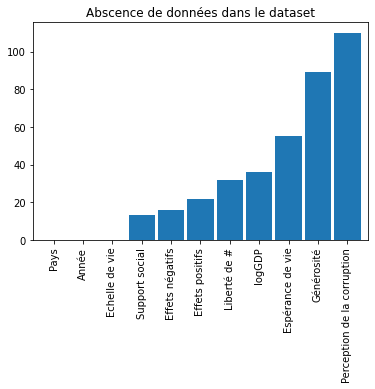

In [208]:
years = df["Année"].unique()

dfpivot = df.pivot(index = "Pays", columns = "Année", values = "Espérance de vie")
#display(dfpivot)

#print(df[df.isna().any(axis=1)])

#dfpivot.transpose()[["France"]].plot(style='.-')
#dfpivot.transpose()[["France"]].interpolate(method='linear').plot(style='.-')

df.aggregate(func = lambda x: x.isna().sum(), axis = 0).sort_values(ascending = True).plot(kind = 'bar', width=0.9, title = "Abscence de données dans le dataset")

<AxesSubplot:xlabel='Année'>

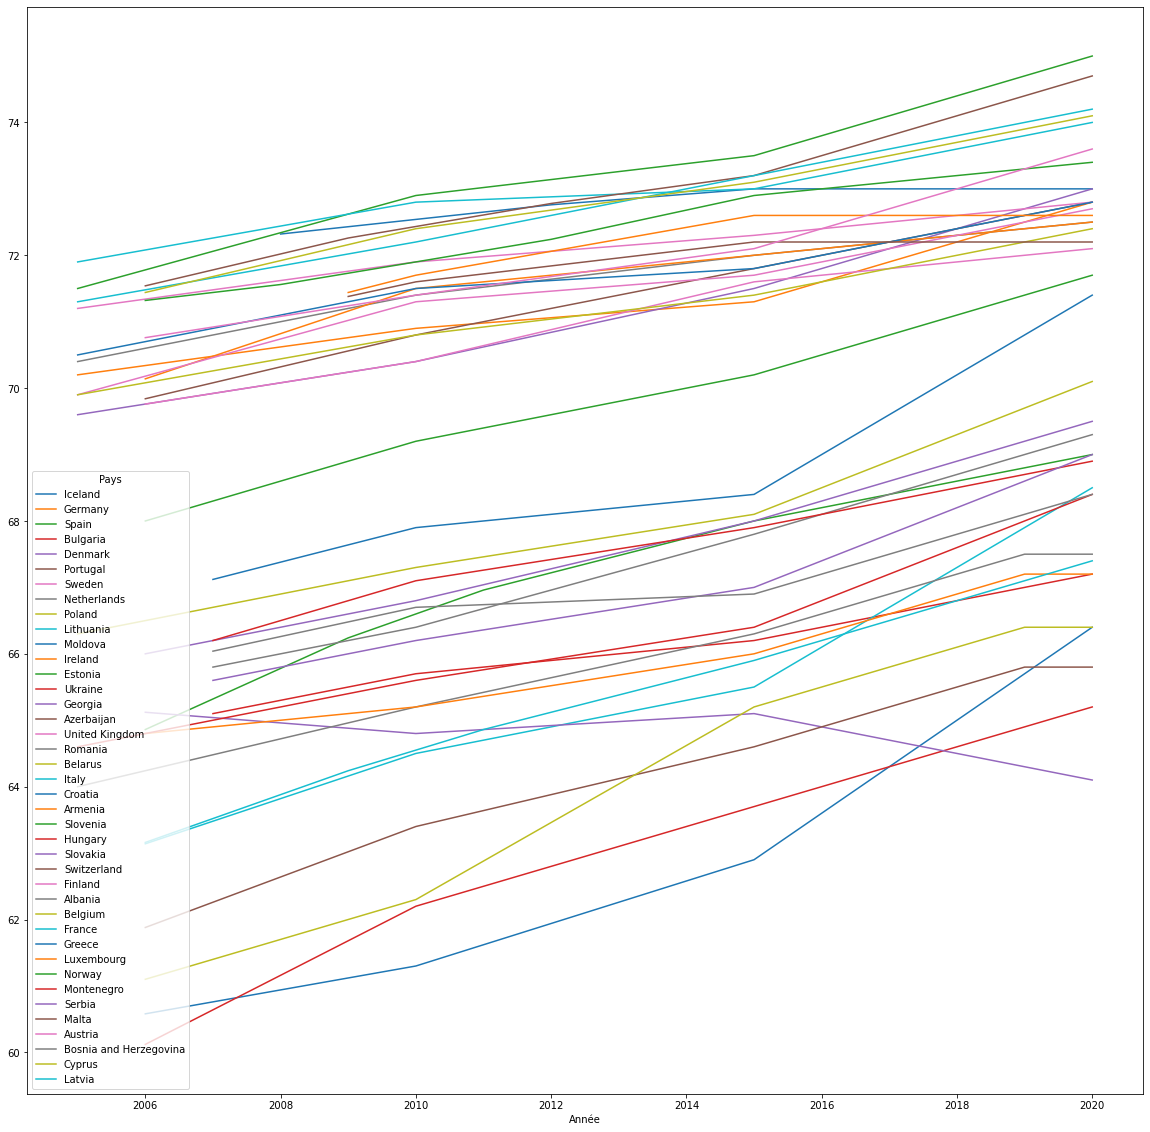

In [169]:
countries_continents_df = _build_dataframe_from_csv("data/Countries-Continents.csv")
countries_continents_df.columns = ["Continent", "Pays"]
countries_continents_df.set_index("Pays", inplace = True)


from enum import Enum

class Continent(Enum):
    AF = "Africa"
    AS = "Asia"
    EU = "Europe"
    NA = "North America"
    OC = "Oceania"
    SA = "South America"

continentId = 'EU'
continent = list(set(countries_continents_df[countries_continents_df["Continent"] == Continent[continentId].value].index.values) & set(dfpivot.index.values))
dfpivot.loc[continent].transpose().interpolate('linear').plot(figsize = (20, 20))
#plt.show()


<AxesSubplot:xlabel='Année'>

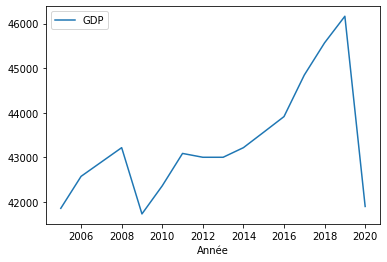

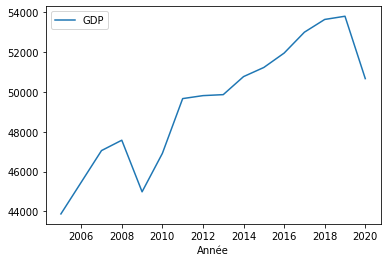

In [102]:
from math import log as log
from math import exp as exp
from math import trunc as trunc

df["GDP"] = df.apply(lambda x: round(exp(x["logGDP"]),2), axis=1)

#df["logGDP"][:200].plot()
pibfr = df[df["Pays"] == "France"][["Année", "GDP"]]
pibde = df[df["Pays"] == "Germany"][["Année", "GDP"]]


pibfr.plot(x = "Année", y = "GDP")
pibde.plot(x = "Année", y = "GDP")
#pibfr["logGDP"] = 10 ** pibfr["logGDP"]
#display(pibfr)
#pibfr.plot(x = "Année", y = "logGDP")